<a href="https://colab.research.google.com/github/AdityaPatidaroo7/Aditya-/blob/main/Neurance_ai_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#loading the data
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [4]:
# Checking the features
df.head()

patient_id              name_of_drug             use_case_for_drug  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3       35696  Buprenorphine / naloxone             Opiate Dependence   
4      155963                    Cialis  Benign Prostatic Hyperplasia   

                                   review_by_patient  effectiveness_rating  \
0  "It has no side effect, I take it in combinati...                     9   
1  "My son is halfway through his fourth week of ...                     8   
2  "I used to take another oral contraceptive, wh...                     5   
3  "Suboxone has completely turned my life around...                     9   
4  "2nd day on 5mg started to work with rock hard...                     2   

  drug_approved_by_UIC  number_of_times_prescribed  base_score  
0            20-May-12                          27    8.022969  
1            27-Apr-10                         192    7.858458  
2            14-Dec-09                          17    6.341969  
3            27-Nov-16                          37    6.590176  
4            28-Nov-15                          43    6.144782

In [5]:
df.tail()

patient_id name_of_drug             use_case_for_drug  \
32160      183202     Cymbalta                       Anxiety   
32161      109111    Nexplanon                 Birth Control   
32162      121154  Venlafaxine                 Panic Disorde   
32163       45410   Fluoxetine  Obsessive Compulsive Disorde   
32164      187382      Orencia          Rheumatoid Arthritis   

                                       review_by_patient  \
32160  "I have been taking Cymbalta for 15 months now...   
32161  "I have had the Nexplanon since Dec. 27, 2016 ...   
32162  "Had panic attacks and social anxiety starting...   
32163  "I have been off Prozac for about 4 weeks now....   
32164  "Limited improvement after 4 months, developed...   

       effectiveness_rating drug_approved_by_UIC  number_of_times_prescribed  \
32160                     9            10-Jun-13                          89   
32161                     6             6-Apr-17                           0   
32162                     9            10-Nov-16                          25   
32163                     8            21-Jan-15                          22   
32164                     2            15-Mar-14                          35   

       base_score  
32160    6.963020  
32161    0.899076  
32162    6.241812  
32163    7.940428  
32164    8.205393

In [6]:
# Checking the information about data types, rangeindex and non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [7]:
# check for missing values
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [8]:
# Checked the summary of the continuous data
df[['effectiveness_rating','number_of_times_prescribed','base_score']].describe()

effectiveness_rating  number_of_times_prescribed    base_score
count          32165.000000                32165.000000  32165.000000
mean               6.998912                   27.893207      6.664261
std                3.274781                   35.819035      1.588699
min                1.000000                    0.000000      0.899076
25%                5.000000                    6.000000      6.109307
50%                8.000000                   16.000000      6.788245
75%               10.000000                   36.000000      7.900790
max               10.000000                  771.000000      8.992453

In [9]:
# Check for catagorical data
df[['name_of_drug','use_case_for_drug','review_by_patient']].describe()

name_of_drug use_case_for_drug review_by_patient
count            32165             32165             32165
unique            2220               636             30121
top     Levonorgestrel     Birth Control            "Good"
freq               724              5795                 8

In [10]:
# Checking the unique values of drugs names of top 10.
use_case_for_drug = df["name_of_drug"].value_counts().sort_values(ascending=False)
use_case_for_drug=pd.DataFrame(use_case_for_drug[:10]).reset_index()
use_case_for_drug

index  name_of_drug
0                      Levonorgestrel           724
1                        Etonogestrel           628
2   Ethinyl estradiol / norethindrone           547
3    Ethinyl estradiol / norgestimate           425
4                           Nexplanon           397
5  Ethinyl estradiol / levonorgestrel           394
6                         Phentermine           296
7                          Sertraline           281
8                        Escitalopram           265
9                              Mirena           241

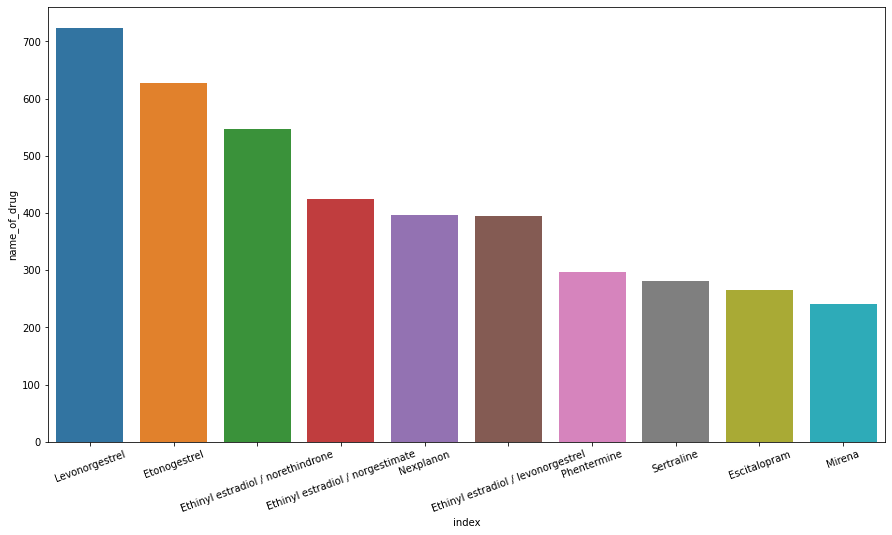

In [11]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.barplot(x='index', y='name_of_drug', data=use_case_for_drug)
plt.xticks(rotation=20)
plt.show()

In [12]:
# analysing top drug
drg_1 = df[df['name_of_drug']=='Levonorgestrel']
drg_1

patient_id    name_of_drug        use_case_for_drug  \
79         130586  Levonorgestrel            Birth Control   
100        165993  Levonorgestrel  Emergency Contraception   
136        166235  Levonorgestrel            Birth Control   
288        129725  Levonorgestrel            Birth Control   
317        129147  Levonorgestrel  Emergency Contraception   
...           ...             ...                      ...   
31957      129627  Levonorgestrel  Emergency Contraception   
32100      129470  Levonorgestrel  Emergency Contraception   
32107      129858  Levonorgestrel            Birth Control   
32146      130934  Levonorgestrel            Birth Control   
32156      142183  Levonorgestrel            Birth Control   

                                       review_by_patient  \
79     "I have had my Mirena for three months now. In...   
100    "I always read reviews as I am always paranoid...   
136    "I had this inserted today.  Due to extremely ...   
288    "I was on Skyla for about 2 years and had an o...   
317    "I felt I needed to add one of these, it was t...   
...                                                  ...   
31957  "So I had unprotected sex and then I realized ...   
32100  "Just thought I&#039;d share since it made me ...   
32107  "I got the mirena 3 days ago and I&#039;ve had...   
32146  "I had my Mirena in for a year and half and ju...   
32156  "There are some bad reviews about Kyleena - so...   

       effectiveness_rating drug_approved_by_UIC  number_of_times_prescribed  \
79                       10             1-May-12                           2   
100                      10             6-Feb-17                           9   
136                       9            17-Jan-17                           2   
288                       6            29-May-15                          13   
317                      10            15-Oct-15                          11   
...                     ...                  ...                         ...   
31957                     1            24-Jun-15                           3   
32100                    10            16-Aug-15                           2   
32107                     4            25-Apr-15                           9   
32146                     2             6-Jan-11                           3   
32156                    10             6-Dec-17                           0   

       base_score  
79       8.074493  
100      8.656797  
136      8.174544  
288      1.632839  
317      7.544493  
...           ...  
31957    7.050087  
32100    8.074493  
32107    8.494570  
32146    8.311305  
32156    6.109307  

[724 rows x 8 columns]

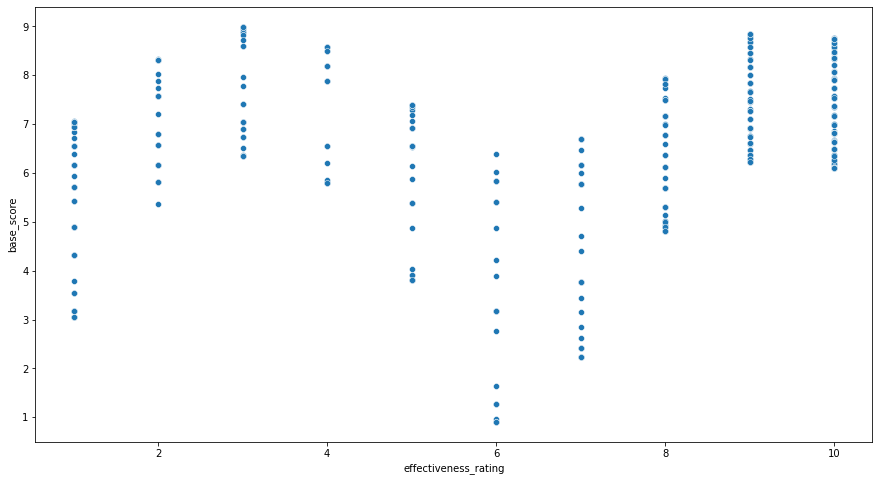

In [13]:
sns.scatterplot(x = "effectiveness_rating", y="base_score",data=drg_1)

In [14]:
 df['review_by_patient'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [15]:
a = df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug').agg('mean').reset_index()
a = a.sort_values(['effectiveness_rating', 'base_score'],ascending= False)
a

name_of_drug  effectiveness_rating  base_score
268   Benzoic acid / salicylic acid                  10.0    8.757201
408                       Chaparral                  10.0    8.757201
450               CitraNatal 90 DHA                  10.0    8.757201
349                           Calan                  10.0    8.756849
2154                        Xolegel                  10.0    8.756849
...                             ...                   ...         ...
1754                     Romidepsin                   1.0    3.054420
1982                Toujeo Solostar                   1.0    3.054420
2029                 Tums Smoothies                   1.0    3.054420
2077                      Vandazole                   1.0    3.054420
2158                         Xtandi                   1.0    3.054420

[2220 rows x 3 columns]

In [16]:
a.value_counts()

name_of_drug                          effectiveness_rating  base_score
Abacavir / dolutegravir / lamivudine  8.857143              5.908076      1
Onfi                                  8.000000              6.358312      1
Omnaris                               8.000000              3.504191      1
Omnicef                               3.000000              6.838803      1
Omnitrope                             10.000000             8.745991      1
                                                                         ..
Ephedrine / guaifenesin               8.000000              7.893476      1
Epclusa                               7.818182              7.113168      1
Enzalutamide                          1.000000              7.050087      1
Entyvio                               3.500000              7.618344      1
ella                                  7.200000              6.427585      1
Length: 2220, dtype: int64

In [17]:
# Analysing the drug name and efective rating with groupby
b = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(set)).reset_index()
b

name_of_drug             effectiveness_rating
0     Abacavir / dolutegravir / lamivudine                       {10, 5, 7}
1                                Abatacept                             {10}
2                                  Abilify  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
3                         Abilify Discmelt                              {8}
4                              Abiraterone                             {10}
...                                    ...                              ...
2215                               Zyprexa        {1, 2, 3, 6, 7, 8, 9, 10}
2216                 Zyprexa Intramuscular                              {8}
2217                                Zyrtec              {1, 3, 5, 7, 9, 10}
2218                                 Zyvox                       {9, 10, 5}
2219                                  ella           {2, 5, 6, 7, 8, 9, 10}

[2220 rows x 2 columns]

In [18]:
c = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(list)).reset_index()
c

name_of_drug  \
0     Abacavir / dolutegravir / lamivudine   
1                                Abatacept   
2                                  Abilify   
3                         Abilify Discmelt   
4                              Abiraterone   
...                                    ...   
2215                               Zyprexa   
2216                 Zyprexa Intramuscular   
2217                                Zyrtec   
2218                                 Zyvox   
2219                                  ella   

                                   effectiveness_rating  
0                            [10, 10, 7, 5, 10, 10, 10]  
1                                                  [10]  
2     [5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9...  
3                                                   [8]  
4                                                  [10]  
...                                                 ...  
2215  [2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3...  
2216                                                [8]  
2217  [9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3...  
2218                              [9, 9, 10, 5, 10, 10]  
2219                    [8, 5, 8, 6, 8, 9, 10, 7, 9, 2]  

[2220 rows x 2 columns]

In [19]:
from statistics import mean

In [20]:
b['unique_ratings'] = b['effectiveness_rating'].apply(lambda x: len(x))
b['lst_effectiveness_rating'] = c['effectiveness_rating']
b['unique_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: len(x))
b['avg_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: mean(x))
b

name_of_drug             effectiveness_rating  \
0     Abacavir / dolutegravir / lamivudine                       {10, 5, 7}   
1                                Abatacept                             {10}   
2                                  Abilify  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}   
3                         Abilify Discmelt                              {8}   
4                              Abiraterone                             {10}   
...                                    ...                              ...   
2215                               Zyprexa        {1, 2, 3, 6, 7, 8, 9, 10}   
2216                 Zyprexa Intramuscular                              {8}   
2217                                Zyrtec              {1, 3, 5, 7, 9, 10}   
2218                                 Zyvox                       {9, 10, 5}   
2219                                  ella           {2, 5, 6, 7, 8, 9, 10}   

      unique_ratings                           lst_effectiveness_rating  \
0                  3                         [10, 10, 7, 5, 10, 10, 10]   
1                  1                                               [10]   
2                 10  [5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9...   
3                  1                                                [8]   
4                  1                                               [10]   
...              ...                                                ...   
2215               8  [2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3...   
2216               1                                                [8]   
2217               6  [9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3...   
2218               3                              [9, 9, 10, 5, 10, 10]   
2219               7                    [8, 5, 8, 6, 8, 9, 10, 7, 9, 2]   

      unique_lst_ratings  avg_lst_ratings  
0                      7         8.857143  
1                      1        10.000000  
2                     77         6.259740  
3                      1         8.000000  
4                      1        10.000000  
...                  ...              ...  
2215                  28         6.892857  
2216                   1         8.000000  
2217                  16         6.937500  
2218                   6         8.833333  
2219                  10         7.200000  

[2220 rows x 6 columns]

In [21]:
b['unique_ratings'].value_counts()

1     808
2     355
3     234
4     184
5     146
10    134
6      95
7      91
9      88
8      85
Name: unique_ratings, dtype: int64

**Data** **Preprocessing**






In [22]:
def clean_review(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [23]:
df['clean_review'] = clean_review(df['review_by_patient'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


In [24]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer


In [25]:
# Removing the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
df['clean_review']

0        side effect take combination bystolic 5 mg fis...
1        son halfway fourth week intuniv became concern...
2        used take another oral contraceptive 21 pill c...
3        suboxone completely turned life around feel he...
4        2nd day 5mg started work rock hard erections h...
                               ...                        
32160    taking cymbalta 15 months first 30mg six month...
32161    nexplanon since dec 27 2016 got first period e...
32162    panic attacks social anxiety starting adolesce...
32163    prozac 4 weeks starting 2 years ago terrible d...
32164    limited improvement 4 months developed bad ras...
Name: clean_review, Length: 32165, dtype: object

In [27]:
 #Removing the word stems using the Snowball Stemmer[STEMMING]
Snow_ball = SnowballStemmer("english")
df['clean_review'] = df['clean_review'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [28]:
df['clean_review'] 

0             side effect take combin bystol 5 mg fish oil
1        son halfway fourth week intuniv becam concern ...
2        use take anoth oral contracept 21 pill cycl ha...
3        suboxon complet turn life around feel healthie...
4        2nd day 5mg start work rock hard erect howev e...
                               ...                        
32160    take cymbalta 15 month first 30mg six month la...
32161    nexplanon sinc dec 27 2016 got first period en...
32162    panic attack social anxieti start adolesc powe...
32163    prozac 4 week start 2 year ago terribl depress...
32164    limit improv 4 month develop bad rash md refus...
Name: clean_review, Length: 32165, dtype: object

In [29]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [30]:
df['sentiment'] = sentiment(df['review_by_patient'])

In [31]:
df['sentiment_clean'] = sentiment(df['clean_review'])


In [32]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df['review_clean_ss'] = clean_review(df['clean_review'])
df['sentiment_clean_ss'] = sentiment(df['review_clean_ss'])

In [33]:
df = df.dropna(how="any", axis=0)

In [34]:
#Word count in each review
df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['word_unique_count']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['letter_count']=df["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df["punctuation_count"] = df["review_by_patient"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["word_upper_count"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["title_word_case"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["stopwards_count"] = df["review_by_patient"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df["len_word_mean"] = df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [35]:
df.head(2)

patient_id name_of_drug             use_case_for_drug  \
0      206461    Valsartan  Left Ventricular Dysfunction   
1       95260   Guanfacine                          ADHD   

                                   review_by_patient  effectiveness_rating  \
0  "It has no side effect, I take it in combinati...                     9   
1  "My son is halfway through his fourth week of ...                     8   

  drug_approved_by_UIC  number_of_times_prescribed  base_score  \
0            20-May-12                          27    8.022969   
1            27-Apr-10                         192    7.858458   

                                        clean_review  sentiment  ...  \
0       side effect take combin bystol 5 mg fish oil   0.000000  ...   
1  son halfway fourth week intuniv becam concern ...   0.168333  ...   

                                     review_clean_ss sentiment_clean_ss  \
0       side effect take combin bystol 5 mg fish oil           0.000000   
1  son halfway fourth week intuniv becam concern ...           0.114583   

   count_word  word_unique_count  letter_count  punctuation_count  \
0           9                  9            44                  3   
1          66                 55           373                 23   

   word_upper_count  title_word_case  stopwards_count  len_word_mean  
0                 1                6                7       4.000000  
1                 2               13               69       4.666667  

[2 rows x 21 columns]

In [36]:
df.corr()

patient_id  effectiveness_rating  \
patient_id                    1.000000              0.018803   
effectiveness_rating          0.018803              1.000000   
number_of_times_prescribed    0.017499              0.242224   
base_score                    0.010924              0.412301   
sentiment                     0.017265              0.353804   
sentiment_clean               0.004093              0.242021   
sentiment_clean_ss            0.004093              0.242021   
count_word                    0.003166              0.019697   
word_unique_count             0.002281              0.018781   
letter_count                  0.003341              0.019339   
punctuation_count            -0.001753             -0.002690   
word_upper_count              0.001935              0.011001   
title_word_case               0.008600              0.047460   
stopwards_count               0.006647              0.026308   
len_word_mean                 0.005953             -0.000251   

                            number_of_times_prescribed  base_score  sentiment  \
patient_id                                    0.017499    0.010924   0.017265   
effectiveness_rating                          0.242224    0.412301   0.353804   
number_of_times_prescribed                    1.000000    0.134295   0.101878   
base_score                                    0.134295    1.000000   0.151597   
sentiment                                     0.101878    0.151597   1.000000   
sentiment_clean                               0.052821    0.099588   0.657190   
sentiment_clean_ss                            0.052821    0.099588   0.657190   
count_word                                    0.026988   -0.001759  -0.114975   
word_unique_count                             0.030976   -0.000791  -0.118338   
letter_count                                  0.036008   -0.000507  -0.112659   
punctuation_count                            -0.008018   -0.008574  -0.087697   
word_upper_count                              0.022686    0.006631  -0.080927   
title_word_case                               0.052514    0.015513  -0.075605   
stopwards_count                               0.015854    0.002815  -0.103838   
len_word_mean                                 0.058342    0.010046   0.025451   

                            sentiment_clean  sentiment_clean_ss  count_word  \
patient_id                         0.004093            0.004093    0.003166   
effectiveness_rating               0.242021            0.242021    0.019697   
number_of_times_prescribed         0.052821            0.052821    0.026988   
base_score                         0.099588            0.099588   -0.001759   
sentiment                          0.657190            0.657190   -0.114975   
sentiment_clean                    1.000000            1.000000   -0.099235   
sentiment_clean_ss                 1.000000            1.000000   -0.099235   
count_word                        -0.099235           -0.099235    1.000000   
word_unique_count                 -0.100365           -0.100365    0.985659   
letter_count                      -0.099217           -0.099217    0.992337   
punctuation_count                 -0.075039           -0.075039    0.792822   
word_upper_count                  -0.070380           -0.070380    0.677536   
title_word_case                   -0.060739           -0.060739    0.804033   
stopwards_count                   -0.081837           -0.081837    0.896583   
len_word_mean                      0.001361            0.001361   -0.103257   

                            word_unique_count  letter_count  \
patient_id                           0.002281      0.003341   
effectiveness_rating                 0.018781      0.019339   
number_of_times_prescribed           0.030976      0.036008   
base_score                          -0.000791     -0.000507   
sentiment                           -0.118338     -0.112659   
sentiment_clean                     -0.100365     -0.099217   


In [37]:
df.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'clean_review', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'word_unique_count', 'letter_count', 'punctuation_count',
       'word_upper_count', 'title_word_case', 'stopwards_count',
       'len_word_mean'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['use_case_for_drug']=labelencoder.fit_transform(df['use_case_for_drug'])
df['name_of_drug'] =labelencoder.fit_transform(df['name_of_drug'])


In [39]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df[['use_case_for_drug','name_of_drug']])

In [40]:
df[['use_case_for_drug_scl','name_of_drug_scl']] = scaled

In [41]:
df.head()

patient_id  name_of_drug  use_case_for_drug  \
0      206461          2072                335   
1       95260           923                 39   
2       92703          1212                110   
3       35696           332                412   
4      155963           436                105   

                                   review_by_patient  effectiveness_rating  \
0  "It has no side effect, I take it in combinati...                     9   
1  "My son is halfway through his fourth week of ...                     8   
2  "I used to take another oral contraceptive, wh...                     5   
3  "Suboxone has completely turned my life around...                     9   
4  "2nd day on 5mg started to work with rock hard...                     2   

  drug_approved_by_UIC  number_of_times_prescribed  base_score  \
0            20-May-12                          27    8.022969   
1            27-Apr-10                         192    7.858458   
2            14-Dec-09                          17    6.341969   
3            27-Nov-16                          37    6.590176   
4            28-Nov-15                          43    6.144782   

                                        clean_review  sentiment  ...  \
0       side effect take combin bystol 5 mg fish oil   0.000000  ...   
1  son halfway fourth week intuniv becam concern ...   0.168333  ...   
2  use take anoth oral contracept 21 pill cycl ha...   0.067210  ...   
3  suboxon complet turn life around feel healthie...   0.194444  ...   
4  2nd day 5mg start work rock hard erect howev e...   0.003472  ...   

   count_word word_unique_count  letter_count  punctuation_count  \
0           9                 9            44                  3   
1          66                55           373                 23   
2          72                51           410                 34   
3          63                55           397                 28   
4          51                41           275                 22   

   word_upper_count  title_word_case  stopwards_count  len_word_mean  \
0                 1                6                7       4.000000   
1                 2               13               69       4.666667   
2                 6               15               59       4.708333   
3                 7               15               60       5.317460   
4                 0                3               18       4.411765   

   use_case_for_drug_scl  name_of_drug_scl  
0               0.527559          0.933754  
1               0.061417          0.415953  
2               0.173228          0.546192  
3               0.648819          0.149617  
4               0.165354          0.196485  

[5 rows x 23 columns]

Model **Building**

In [42]:
import statsmodels.formula.api as smf 
model = smf.ols('base_score~use_case_for_drug_scl+name_of_drug_scl+ effectiveness_rating + number_of_times_prescribed + sentiment + sentiment_clean + sentiment_clean_ss + count_word + word_unique_count + letter_count + punctuation_count + word_upper_count + title_word_case + stopwards_count + len_word_mean',data = df).fit()

In [43]:
model1 = smf.ols('base_score~patient_id + use_case_for_drug + effectiveness_rating + number_of_times_prescribed + sentiment + sentiment_clean + sentiment_clean_ss + count_word + word_unique_count + letter_count + punctuation_count + word_upper_count + title_word_case + stopwards_count + len_word_mean',data = df).fit()

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     476.4
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:                -57495.
No. Observations:               32163   AIC:                         1.150e+05
Df Residuals:                   32148   BIC:                         1.151e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.2603      0.154     34.115      0.000       4.958       5.563
patient_id                  5.838e-08    1.2e-07      0.486      0.627   -1.77e-07    2.94e-07
use_case_for_drug             -0.0001   4.69e-05     -2.325      0.020      -0.000   -1.72e-05
effectiveness_rating           0.1955      0.003     72.094      0.000       0.190       0.201
number_of_times_prescribed     0.0016      0.000      6.974      0.000       0.001       0.002
sentiment                      0.0614      0.050      1.219      0.223      -0.037       0.160
sentiment_clean               -0.0215      0.024     -0.903      0.366      -0.068       0.025
sentiment_clean_ss            -0.0215      0.024     -0.903      0.366      -0.068       0.025
count_word                    -0.0064      0.005     -1.296      0.195      -0.016       0.003
word_unique_count              0.0025      0.003      0.929      0.353      -0.003       0.008
letter_count                   0.0006      0.001      0.717      0.473      -0.001       0.002
punctuation_count              0.0004      0.001      0.333      0.739      -0.002       0.003
word_upper_count               0.0077      0.003      2.262      0.024       0.001       0.014
title_word_case               -0.0007      0.003     -0.252      0.801      -0.006       0.005
stopwards_count               -0.0007      0.001     -0.710      0.478      -0.003       0.001
len_word_mean                  0.0079      0.031      0.251      0.802      -0.054       0.069
==============================================================================
Omnibus:                     2977.256   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4194.444
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       3.952   Cond. No.                     3.35e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             base_score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     476.4
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:49:01   Log-Likelihood:                -57494.
No. Observations:               32163   AIC:                         1.150e+05
Df Residuals:                   32148   BIC:                         1.151e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.2561      0.154     34.062      0.000       4.954       5.559
use_case_for_drug_scl         -0.0714      0.030     -2.387      0.017      -0.130      -0.013
name_of_drug_scl               0.0216      0.029      0.736      0.462      -0.036       0.079
effectiveness_rating           0.1955      0.003     72.103      0.000       0.190       0.201
number_of_times_prescribed     0.0016      0.000      6.971      0.000       0.001       0.002
sentiment                      0.0618      0.050      1.228      0.219      -0.037       0.160
sentiment_clean               -0.0215      0.024     -0.902      0.367      -0.068       0.025
sentiment_clean_ss            -0.0215      0.024     -0.902      0.367      -0.068       0.025
count_word                    -0.0064      0.005     -1.287      0.198      -0.016       0.003
word_unique_count              0.0024      0.003      0.923      0.356      -0.003       0.008
letter_count                   0.0006      0.001      0.710      0.478      -0.001       0.002
punctuation_count              0.0004      0.001      0.330      0.741      -0.002       0.003
word_upper_count               0.0077      0.003      2.259      0.024       0.001       0.014
title_word_case               -0.0007      0.003     -0.255      0.799      -0.006       0.005
stopwards_count               -0.0007      0.001     -0.709      0.478      -0.003       0.001
len_word_mean                  0.0081      0.031      0.258      0.796      -0.053       0.070
==============================================================================
Omnibus:                     2977.564   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4195.117
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       3.952   Cond. No.                     4.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
y_pred = model.predict()

In [47]:
df = df.dropna(how="any", axis=0)
x = df[['use_case_for_drug_scl','name_of_drug_scl','effectiveness_rating' ,'number_of_times_prescribed','sentiment',
        'sentiment_clean','sentiment_clean_ss','count_word','word_unique_count','letter_count','punctuation_count',
        'word_upper_count','title_word_case','stopwards_count','len_word_mean']]
y = df['base_score']

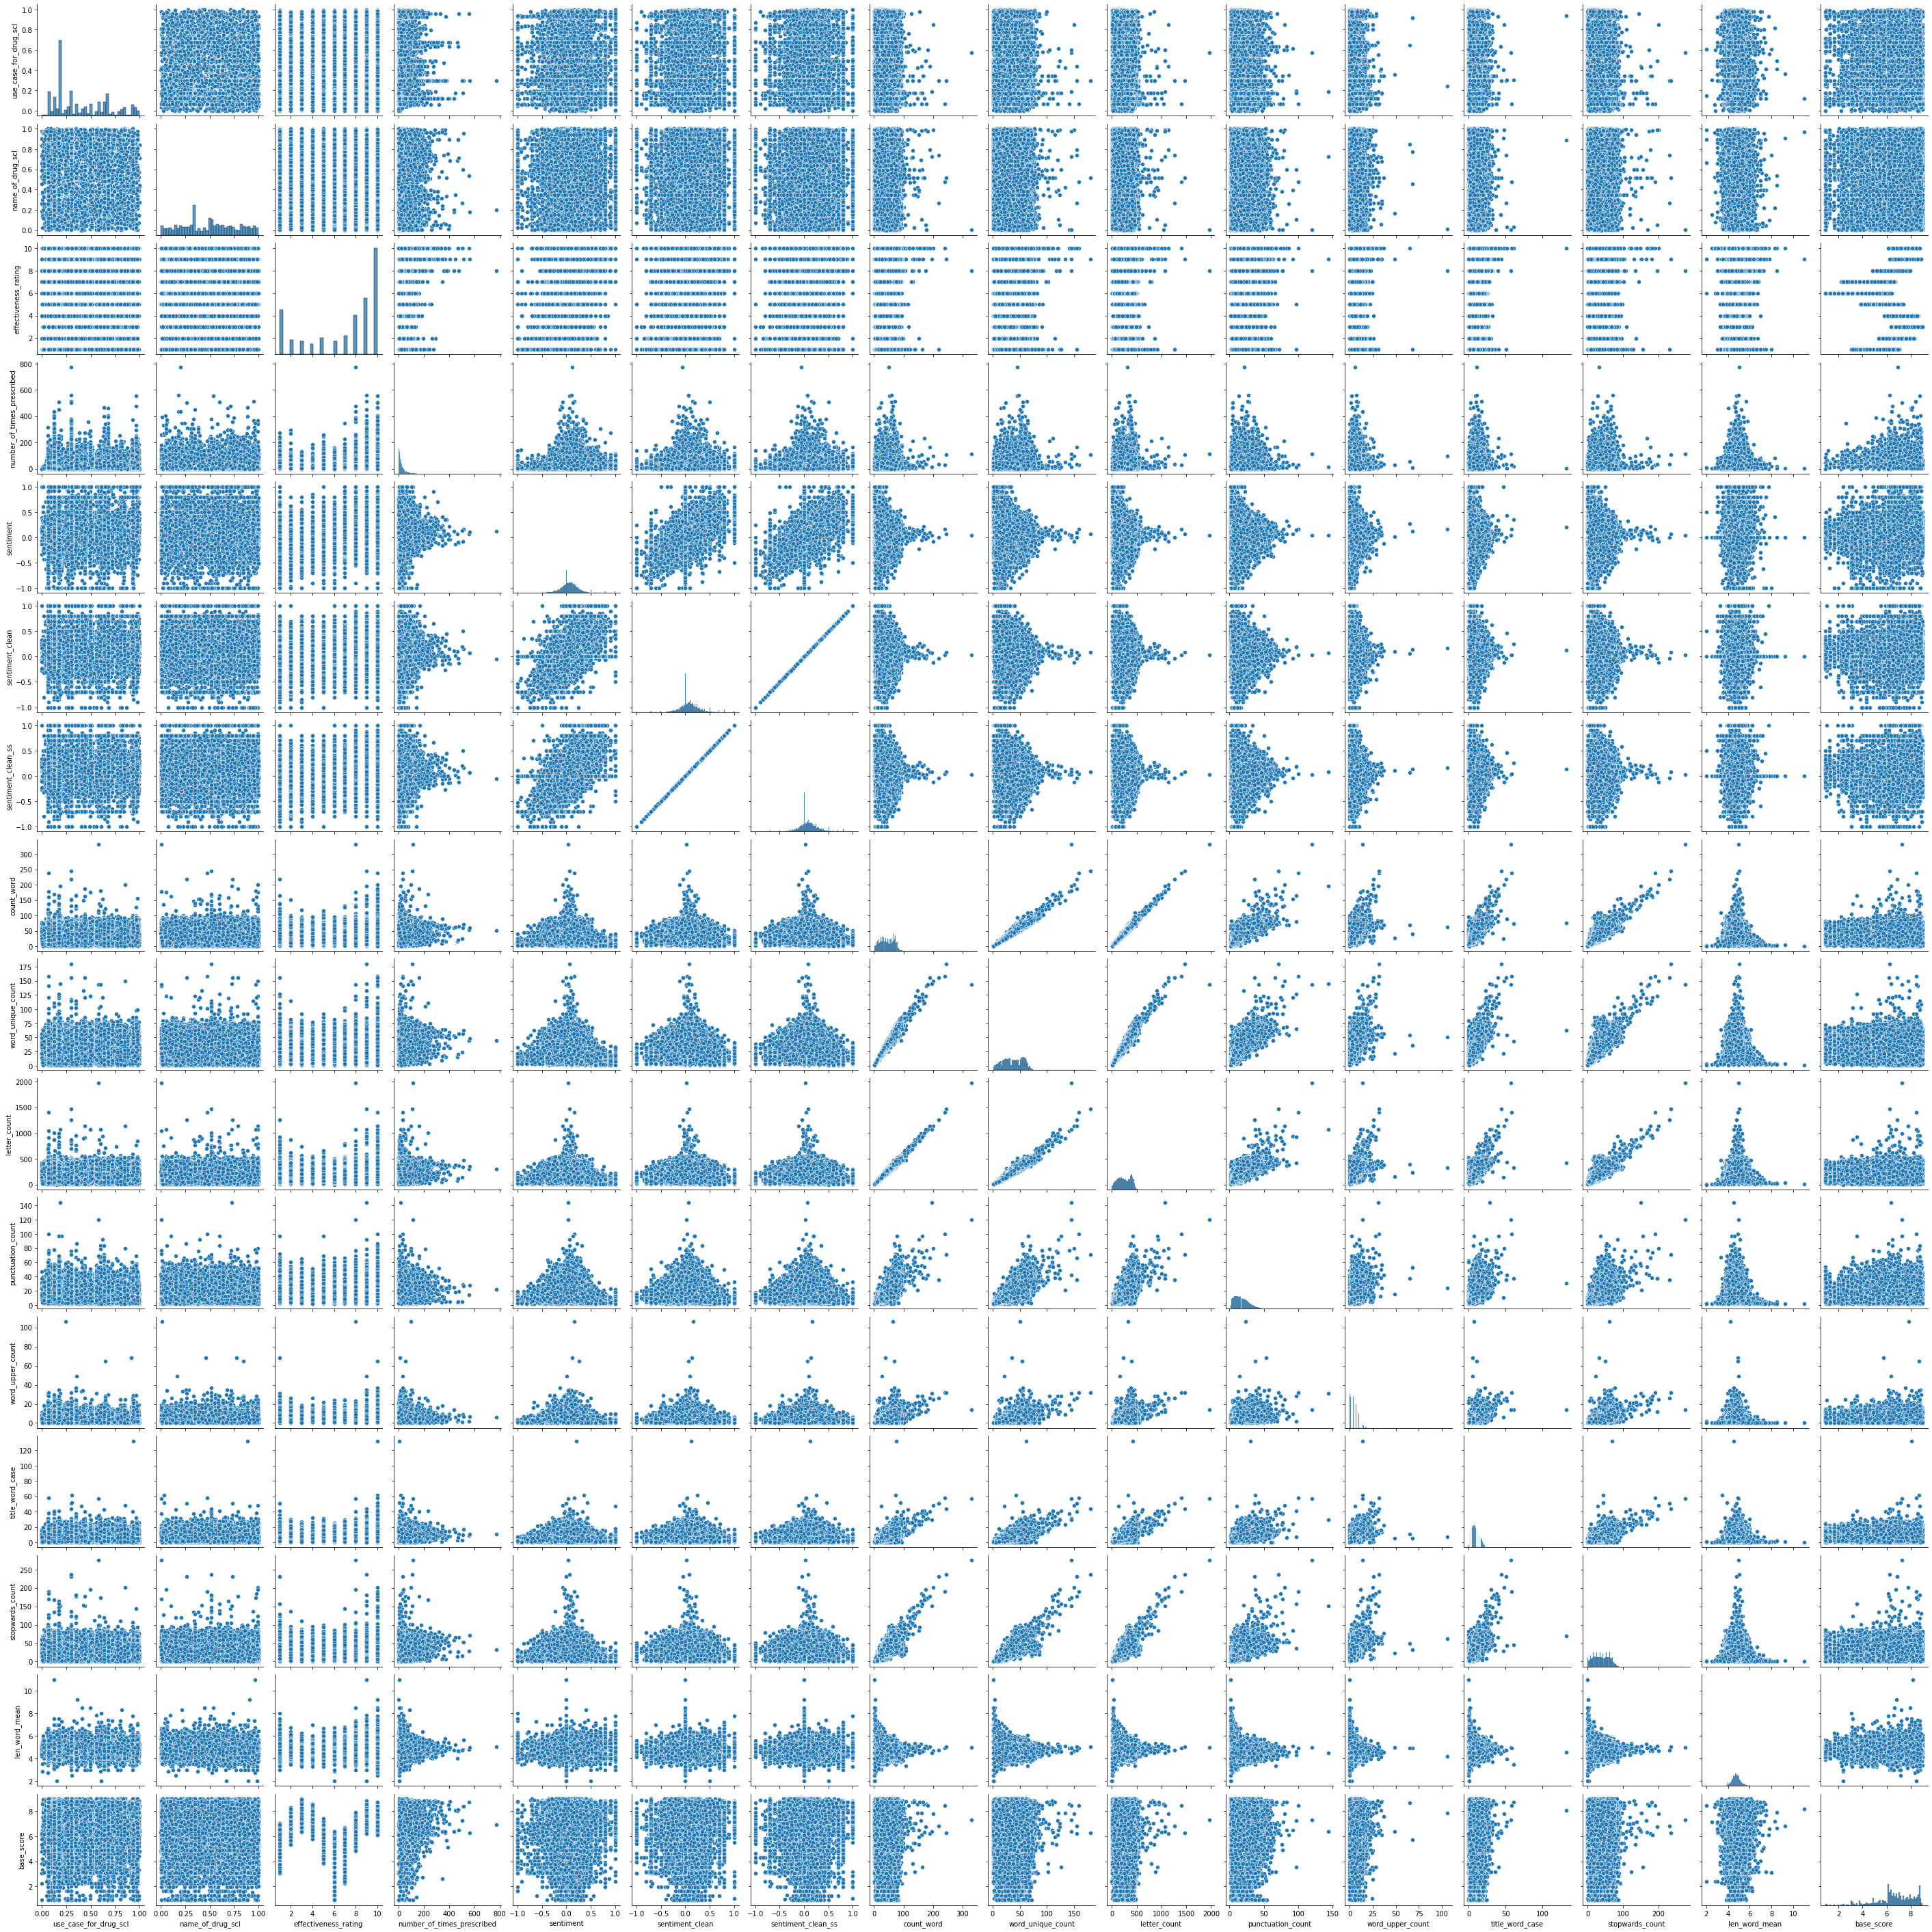

In [48]:
sns.pairplot(df[['use_case_for_drug_scl','name_of_drug_scl','effectiveness_rating' ,'number_of_times_prescribed','sentiment',
        'sentiment_clean','sentiment_clean_ss','count_word','word_unique_count','letter_count','punctuation_count',
        'word_upper_count','title_word_case','stopwards_count','len_word_mean','base_score']])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)

In [50]:
X_test.shape

(3217, 15)

In [51]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 40)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40)

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
y_pred

array([8.75720098, 4.3192734 , 8.6715799 , ..., 5.93302712, 4.55988758,
       6.17313446])

In [54]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [55]:
rmse

0.26860944664963854

In [64]:

from sklearn.model_selection import train_test_split , GridSearchCV , KFold, cross_val_score
params = {'criterion' : ["squared_error"],'max_depth': [10,20,30,40], 'min_samples_split': [2,4,8]}

model_test = DecisionTreeRegressor()
gcv = GridSearchCV(estimator=model_test,scoring='neg_root_mean_squared_error',param_grid=params, n_jobs= 5)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_root_mean_squared_error')

In [65]:
print(gcv.best_score_)
print(gcv.best_params_)

-0.3057774694659752
{'criterion': 'squared_error', 'max_depth': 40, 'min_samples_split': 8}


In [66]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth = 40, min_samples_split=8)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40, min_samples_split=8)

In [67]:
y_pred = regressor.predict(X_test)
y_pred

array([8.75720098, 4.3192734 , 8.6715799 , ..., 5.93302712, 4.55988758,
       6.17313446])

In [68]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse

(0.07011345707119639, 0.26478945800616077)

In [71]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test, y_pred)

0.9719082164036054

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [81]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

1.6510252130741918
1.2849222595449858


In [90]:
r2_score(y_test, prediction)

0.3392585648738895

In [88]:
## Define Grid 
grid = { 
    'n_estimators': [350,400,450,500],
    'max_features': ['sqrt'],
    'max_depth' : [10,15,20,30],
    'random_state' : [18]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5, n_jobs =5 )
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'max_depth': [10, 15, 20, 30],
                         'max_features': ['sqrt'],
                         'n_estimators': [350, 400, 450, 500],
                         'random_state': [18]})

In [89]:
print(CV_rfr.best_score_)
print(CV_rfr.best_params_)

0.6591160390211637
{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 18}
